| Imię Nazwisko | Kierunek | Data | Temat |
| :-: | :-: | :-: | :-: |
| Andrzej Szafarczyk | Informatyka Techniczna |  13.04.2021 | Kwadratury - Metody proste |


### Całkowanie numeryczne 
##### jest to metoda numeryczna polegająca na przybliżonym obliczaniu całek oznaczonych. Termin kwadratura numeryczna, często po prostu kwadratura, jest synonimem całkowania numerycznego, w szczególności w odniesieniu do całek jednowymiarowych. Dwu- i wielowymiarowe całkowania nazywane są czasami kubaturami, choć nazwa kwadratura odnosi się również do całkowania w wyższych wymiarach.

##### Proste metody całkowania numerycznego polegają na przybliżeniu całki za pomocą odpowiedniej sumy ważonej wartości całkowanej funkcji w kilku punktach. Aby uzyskać dokładniejsze przybliżenie dzieli się przedział całkowania na niewielkie fragmenty. Ostateczny wynik jest sumą oszacowań całek w poszczególnych podprzedziałach. Najczęściej przedział dzieli się na równe podprzedziały, ale bardziej wyszukane algorytmy potrafią dostosowywać krok do szybkości zmienności funkcji.

In [98]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import HTML, display
from tabulate import tabulate
from scipy.special.orthogonal import p_roots

sinF = { 'Trapez':[],'Simpson':[] }
expF = { 'Trapez':[],'Simpson':[] } 

def sinFun(x):
    return x**2*math.sin(x)**3
def expFun(x):
    return math.exp(x**2)*(x-1)

def plotCheckerFun(start,end,fun,funLabel):
    fun2 = np.vectorize(fun)
    pointsX=np.linspace(start,end,50)
    pointsY=fun2(pointsX)
    plt.plot(pointsX,pointsY,'r',label=funLabel)

def checkWithNp(start,end,fun,pointAmount):
    pointsX=np.linspace(start,end,pointAmount)
    fun2 = np.vectorize(fun)
    pointsY=fun2(pointsX)
    return np.trapz(pointsY,pointsX)
    


#                                                  Metoda trapezów

Wzór trapezów – jeden z wzorów służących do przybliżonego obliczania całek oznaczonych w sensie Riemanna. Idea wzoru opiera się na geometrycznej interpretacji całki oznaczonej z funkcji nieujemnej jako pola pod wykresem funkcji.

Jeżeli przedział całkowania ${\displaystyle [a,b]}[a,b]$ podzielony zostanie punktami ${\displaystyle x_{1},x_{2},\dots ,x_{n-1}}{\displaystyle x_{1},x_{2},\dots ,x_{n-1}}$ na ${\displaystyle n}n $równych części o długościach ${\displaystyle (b-a)/n,}{\displaystyle (b-a)/n,}$ i w figurę ograniczoną na prostymi ${\displaystyle x=a,}{\displaystyle x=a,} {\displaystyle x=b,}{\displaystyle x=b,}$ osią odciętych oraz wykresem funkcji ${\displaystyle y=f(x)}y=f(x)$ wpiszemy trapezy to pola kolejnych trapezów wynoszą:

${\displaystyle {\frac {b-a}{n}}\cdot {\frac {f(x_{0})+f(x_{1})}{2}},\ {\frac {b-a}{n}}\cdot {\frac {f(x_{1})+f(x_{2})}{2}},\ \dots ,{\frac {b-a}{n}}\cdot {\frac {f(x_{n-1})+f(x_{n})}{2}},}{\displaystyle {\frac {b-a}{n}}\cdot {\frac {f(x_{0})+f(x_{1})}{2}},\ {\frac {b-a}{n}}\cdot {\frac {f(x_{1})+f(x_{2})}{2}},\ \dots ,{\frac {b-a}{n}}\cdot {\frac {f(x_{n-1})+f(x_{n})}{2}},}$
gdzie dla jednolitości oznaczono ${\displaystyle a=x_{0}}{\displaystyle a=x_{0}}$ i ${\displaystyle b=x_{n}.}{\displaystyle b=x_{n}.}$

Suma pól trapezów jest w przybliżeniu równa polu całego obszaru, czyli:

${\displaystyle \int \limits _{a}^{b}f(x)\,dx\approx {\frac {b-a}{{2}{n}}}\left(f(x_{0})+f(x_{n})+2f(x_{1})+\dots +2f(x_{n-1})\right).}{\displaystyle \int \limits _{a}^{b}f(x)\,dx\approx {\frac {b-a}{{2}{n}}}\left(f(x_{0})+f(x_{n})+2f(x_{1})+\dots +2f(x_{n-1})\right).}$
Ten właśnie wzór nazywany jest wzorem trapezów.

In [99]:
def Trapeze(start,end,fun,pointAmount,funLabel=''):
    field =0
    fun2 = np.vectorize(fun)
    pointsX=np.linspace(start,end,pointAmount)
    pointsY=fun2(pointsX)
    dx = pointsX[1]-pointsX[0] 

    plotCheckerFun(start,end,fun,funLabel) # porównaj do funkcji pierwotnej
 
    for i in range(len(pointsX)-1):
        field+= ( (pointsY[i]+pointsY[i+1])*dx *0.5)
       
        xTrap = [pointsX[i],pointsX[i],pointsX[i+1],pointsX[i+1]]
        yTrap = [0,pointsY[i],pointsY[i+1],0]
        plt.fill(xTrap,yTrap,'lightblue',edgecolor='b')
    plt.title("Metoda trapezów")
    plt.legend()
    plt.show()
    return field

#### Obliczmy całkę $  \displaystyle \int \limits _{0}^{4.5} x^2*sin^3(x)dx$ metodą trapezów, oraz porównajmy wynik z wbudowną funkcją w numpy do liczenia całek. 

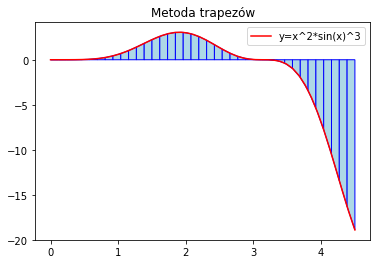

Pole metodą trapezów = -4.42551720829875
Numpy result = -4.425517208298746


In [100]:
print("Pole metodą trapezów =",Trapeze(0,4.5,sinFun,40,'y=x^2*sin(x)^3' )) 
print('Numpy result =',checkWithNp(0,4.5,sinFun,40) )

#### Jak widać dla 40 punktów wynik jest dosyć dokładny. Na wykresie nie da się zauwazyć,żeby pole wybiegało poza pierwotną funkcję. Jeżeli chodzi o poprawność zaimplementowanej metody trapezów, to porównując ją do wyniku z numpy, można stierdzić,że jest poprawna. Sprawdźmy teraz metodę trapezową z wiekszym dx.


Dx =  0.15


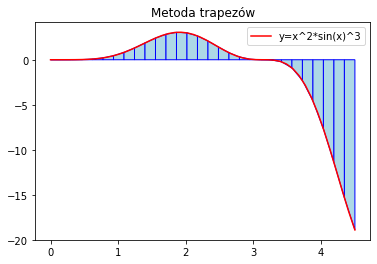

Pole metodą trapezów = -4.444120250702535
Według numpy = -4.4441202507025315
Prawdziwy wynik całki = -4.41710063929139

Dx =  0.225


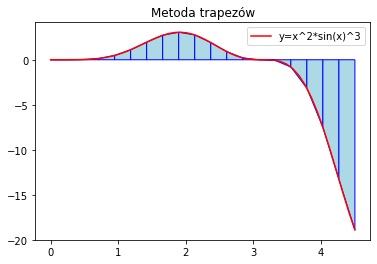

Pole metodą trapezów = -4.499738461760126
Według numpy = -4.499738461760131
Prawdziwy wynik całki = -4.41710063929139

Dx =  0.45


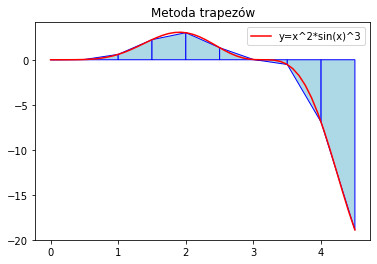

Pole metodą trapezów = -4.846484774673161
Według numpy = -4.8464847746731605
Prawdziwy wynik całki = -4.41710063929139

Dx =  0.9


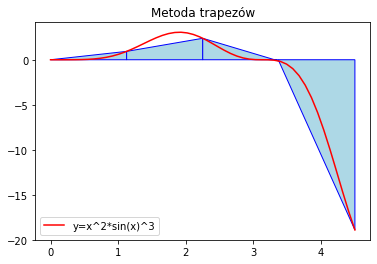

Pole metodą trapezów = -7.0698922049121915
Według numpy = -7.0698922049121915
Prawdziwy wynik całki = -4.41710063929139


In [101]:
for dx in [30,20,10,5]:
    print('\nDx = ', 4.5/dx )
    x= Trapeze(0,4.5,sinFun,dx,'y=x^2*sin(x)^3' )
    sinF['Trapez'].append(x)

    print("Pole metodą trapezów =",x) 
    print('Według numpy =',checkWithNp(0,4.5,sinFun,dx) )
    print('Prawdziwy wynik całki =',checkWithNp(0,4.5,sinFun,50) )    

#### Jak widać, srawdza sie to co twierdzi teoria całkowania. Im większy 'krok' w osi x weźmiemy,tym mniej dokładny wynik otrzymujemy. Sprawdźmy jeszcze nasz algorytm na innej funkcji.  
###  $  \displaystyle \int \limits _{-2}^{2} \exp{x^2}*(x − 1) $




Dx =  0.13333333333333333


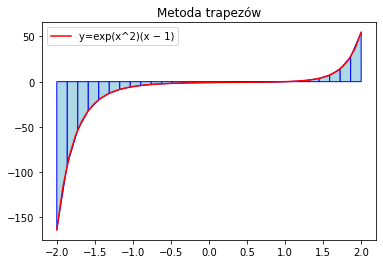

Pole metodą trapezów = -33.592972548143706
Według numpy = -33.592972548143685
Prawdziwy wynik całki = 254458458.4258832

Dx =  0.2


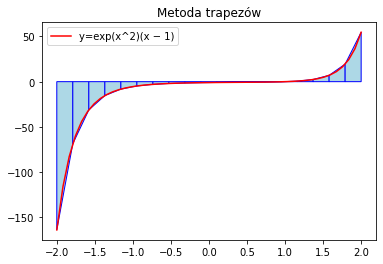

Pole metodą trapezów = -34.49305017371768
Według numpy = -34.493050173717656
Prawdziwy wynik całki = 254458458.4258832

Dx =  0.4


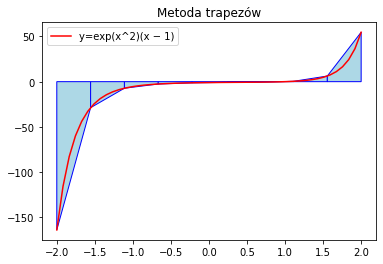

Pole metodą trapezów = -39.63493058029894
Według numpy = -39.634930580298956
Prawdziwy wynik całki = 254458458.4258832

Dx =  0.8


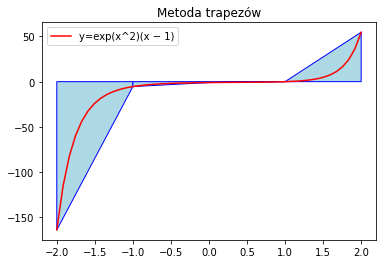

Pole metodą trapezów = -61.03471369006232
Według numpy = -61.03471369006232
Prawdziwy wynik całki = 254458458.4258832


In [102]:
for dx in [30,20,10,5]:
    print('\nDx = ', 4/dx )
    x = Trapeze(-2,2,expFun,dx,'y=exp(x^2)(x − 1)' )

    expF['Trapez'].append(x)

    print("Pole metodą trapezów =",x) 
    print('Według numpy =',checkWithNp(-2,2,expFun,dx) )
    print('Prawdziwy wynik całki =',checkWithNp(0,4.5,expFun,50))   

### Jak widać dla tej funkcji mamy tę samą zasadę - im mniej punktów w danym przedziale,tym mniej precyzyjne wyniki całki.

# Metoda Simpsona

### Całkowanie metodą Simpsona – jedna z metod przybliżania wartości całki oznaczonej funkcji rzeczywistej.

#### Metoda ma zastosowanie do funkcji stablicowanych w nieparzystej liczbie równo odległych punktów (wliczając końce przedziału całkowania). Metoda opiera się na przybliżaniu funkcji całkowanej przez interpolację wielomianem drugiego stopnia.

#### Znając wartości y0,y1,y2 funkcji f(x) w 3 punktach x0,x1,x2 (przy czym x2-x1=x1-x0=h), przybliża się funkcję wielomianem Lagrange’a i całkując w przedziale [x0,x2}], otrzymuje przybliżoną wartość całki:


$ {\displaystyle \int \limits _{x_{0}}^{x_{2}}f(x)dx\approx {\frac {h}{3}}(y_{0}+4y_{1}+y_{2}).} $



In [103]:
def Simpson(start,end,fun,pointAmount,funName=''):

    fun2 = np.vectorize(fun)
    pointsX=np.linspace(start,end,pointAmount+1)
    pointsY=fun2(pointsX)
    dx = pointsX[1]-pointsX[0] 

    plt.plot(pointsX,pointsY,'b')

    plotCheckerFun(start,end,fun,funName)

    field = dx/3 * np.sum(pointsY[0:-1:2] + 4*pointsY[1::2] + pointsY[2::2])
    


    if pointAmount % 2 == 1:
        raise ValueError("Amount of points must be even.")
    
    plt.title("Metoda Simpsona")
    plt.legend()
    plt.show()
    return field
    #area = h/3*(yl+4yc+yr)
    


#### Sprawdźmy,która metda daje dokładniejsze wyniki. Policzmy całkę $  \displaystyle \int \limits _{0}^{4.5} x^2*sin^3(x)dx$ metodą Simpsona, oraz porównajmy wynik z wbudowną funkcją w numpy do liczenia całek. 


Dx =  0.15


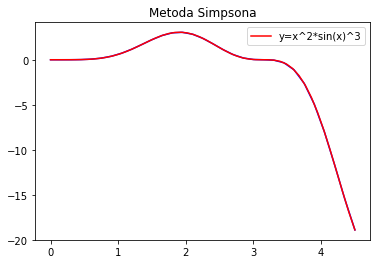

Pole metodą simpsona = -4.4021443989882805
Prawdziwy wynik całki = -4.41710063929139

Dx =  0.225


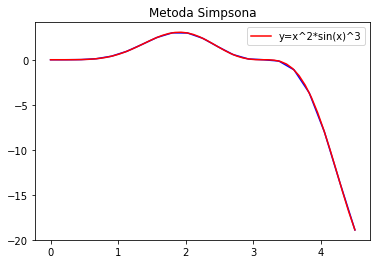

Pole metodą simpsona = -4.4003078771136614
Prawdziwy wynik całki = -4.41710063929139

Dx =  0.45


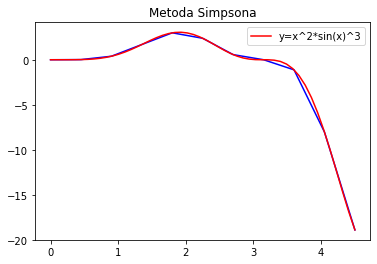

Pole metodą simpsona = -4.357542810863143
Prawdziwy wynik całki = -4.41710063929139

Dx =  0.75


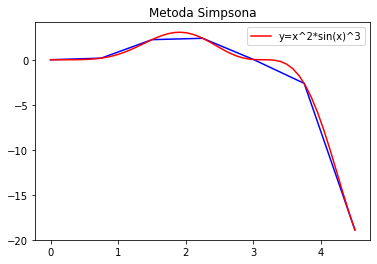

Pole metodą simpsona = -3.6625622037509222
Prawdziwy wynik całki = -4.41710063929139


In [104]:
for dx in [30,20,10,6]:
    print('\nDx = ', 4.5/dx )
    
    x=Simpson(0,4.5,sinFun,dx,'y=x^2*sin(x)^3' )
    sinF['Simpson'].append(x)
    
    print("Pole metodą simpsona =",x) 
    print('Prawdziwy wynik całki =',checkWithNp(0,4.5,sinFun,50) )    

#### Jak widać, podobnie jak przy metodzie trapezów, im większy dx,tym mniej dokładny wynik otrzymujemy. Można jednak zauważyć,szczegółlnie przy mniejszej ilości punktów w danym przedziale, że wyniki są dużo dokładniejsze niż to miało w przypadku metody trapezowej. Przedstawia to poniższa tabela:

In [105]:
print("Poprawny wynik:",checkWithNp(0,4.5,sinFun,50))
pd.DataFrame( sinF, columns=["Trapez","Simpson"], index=[30,20,10,6] )

Poprawny wynik: -4.41710063929139


,Trapez,Simpson
30,-4.444120,-4.402144
20,-4.499738,-4.400308
10,-4.846485,-4.357543
6,-7.069892,-3.662562


### Sprawdźmy czy zachodzi tam sama zależność dla $  \displaystyle \int \limits _{-2}^{2} \exp{x^2}*(x − 1) $


Dx =  0.13333333333333333


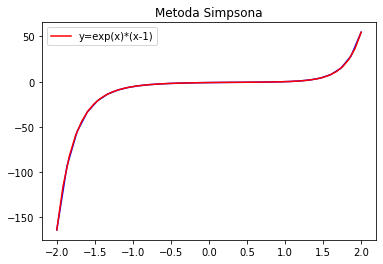

Pole metodą simpsona = -32.92115868294325
Prawdziwy wynik całki = -4.41710063929139

Dx =  0.2


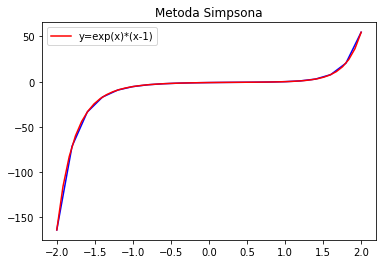

Pole metodą simpsona = -32.98040574902622
Prawdziwy wynik całki = -4.41710063929139

Dx =  0.4


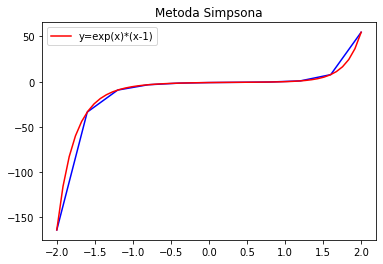

Pole metodą simpsona = -33.79086831693681
Prawdziwy wynik całki = -4.41710063929139

Dx =  0.6666666666666666


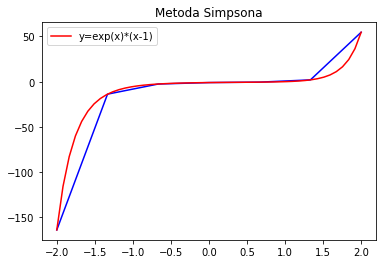

Pole metodą simpsona = -37.059631729340055
Prawdziwy wynik całki = -4.41710063929139


In [106]:
for dx in [30,20,10,6]:
    print('\nDx = ', 4/dx )
    x=Simpson(-2,2,expFun,dx,'y=exp(x)*(x-1)' )
    expF['Simpson'].append(x)
    
    print("Pole metodą simpsona =",x) 
    print('Prawdziwy wynik całki =',checkWithNp(0,4.5,sinFun,50) )    

#### Jak widać, potwierdzają się wnioski wyciągnięte z analizy na poprzedniej funkcji.  Wyniki są dużo dokładniejsze niż to miało w przypadku metody trapezowej. Przedstawia to poniższa tabela:

In [107]:
print('Poprawny wynik:',checkWithNp(-2,2,expFun,50))
pd.DataFrame( expF, columns=["Simpson", "Trapez"], index=[30,20,10,6] )


Poprawny wynik: -33.14722294157711


,Simpson,Trapez
30,-32.921159,-33.592973
20,-32.980406,-34.493050
10,-33.790868,-39.634931
6,-37.059632,-61.034714


# Obliczenia wielomianu: a3*x^4+a3*x^3+a2*x^2+a1*x+a0				


In [108]:
a1 = [55,-2, -6,5, 0.4]

# def pol(x):
#     return a1[3]*x**4 +a1[3]*x**3+a1[2]*x**2+a1[1]*x+a1[0]



In [109]:
def horner(x):
    p = a1[-1]
    i = len(a1) - 2
    while i >= 0:
        p = p * x + a1[i]
        i -= 1
    return p
  

### Do obliczania całki wielomianu wykrzorzystam metodę Simpsona,gdyż jest dokładniejsza

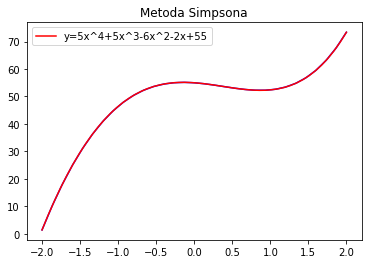

Pole metodą simpsona = 193.12006742386825


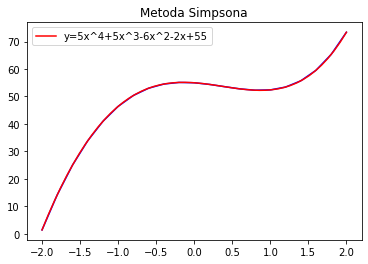

Pole metodą simpsona = 193.12034133333327


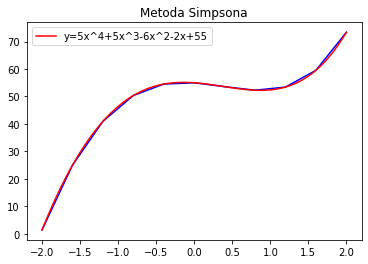

Pole metodą simpsona = 193.12546133333328


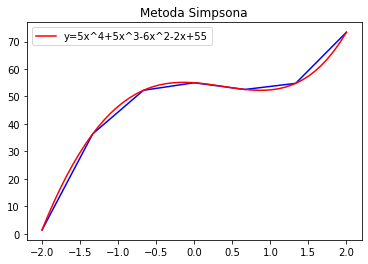

Pole metodą simpsona = 193.1621399176954


In [110]:
for dx in [30,20,10,6]:
    x=Simpson(-2,2,horner,dx,'y=5x^4+5x^3-6x^2-2x+55' )    
    print("Pole metodą simpsona =",x) 
   

###   $  \displaystyle \int \limits _{-2}^{2} 5x^4+5x^3-6x^2-2x+55$ wynosi 193.12

In [111]:
# Recursive generation of the Legendre polynomial of order n
def Legendre(n,x):
    x=np.array(x)
    if (n==0):
        return x*0+1.0
    elif (n==1):
        return x
    else:
        return ((2.0*n-1.0)*x*Legendre(n-1,x)-(n-1)*Legendre(n-2,x))/n
 

#Derivative of the Legendre polynomials
def DLegendre(n,x):
    x=np.array(x)
    if (n==0):
        return x*0
    elif (n==1):
        return x*0+1.0
    else:
        return (n/(x**2-1.0))*(x*Legendre(n,x)-Legendre(n-1,x))
##################################################################
# Roots of the polynomial obtained using Newton-Raphson method
def LegendreRoots(polyorder,tolerance=1e-20):
    if polyorder<2:
        err=1 # bad polyorder no roots can be found
    else:
        roots=[]
        # The polynomials are alternately even and odd functions. So we evaluate only half the number of roots. 
        for i in range(1,int(polyorder/2) +1):
            x=math.cos(math.pi*(i-0.25)/(polyorder+0.5))
            error=10*tolerance
            iters=0
            while (error>tolerance) and (iters<1000):
                dx=-Legendre(polyorder,x)/DLegendre(polyorder,x)
                x=x+dx
                iters=iters+1
                error=abs(dx)
            roots.append(x)
        # Use symmetry to get the other roots
        roots=np.array(roots)
        if polyorder%2==0:
            roots=np.concatenate( (-1.0*roots, roots[::-1]) )
        else:
            roots=np.concatenate( (-1.0*roots, [0.0], roots[::-1]) )
        err=0 # successfully determined roots
    return roots, err
##################################################################
# Weight coefficients
def GaussLegendreWeights(polyorder):
    W=[]
    xis,err=LegendreRoots(polyorder)
    if err==0:
        W=2.0/( (1.0-xis**2)*(DLegendre(polyorder,xis)**2) )
        err=0
    else:
        err=1 # could not determine roots - so no weights
    return W, xis, err
##################################################################

#

# Metoda Gausa

In [112]:

def GaussLegendreQuadrature(func, polyorder, a, b):
    func = np.vectorize(func)
    Ws,xs, err= GaussLegendreWeights(polyorder)
    if err==0:
        ans=(b-a)*0.5*np.sum( Ws*func( (b-a)*0.5*xs+ (b+a)*0.5 ) )
    else: 
        # (in case of error)
        err=1
        ans=None
    return ans,err
##################################################################
# The integrand - change as required
def func(x):
	return math.exp(x)
##################################################################
# 
 


In [ ]:
order=2

# Integrating the function

for order in range(98,100):
    ans,err=GaussLegendreQuadrature(expFun , order, -3,3)
    if err==0:
        print ("Integral : ", ans,'n=',order)
    else:
        print ("Integral evaluation failed")


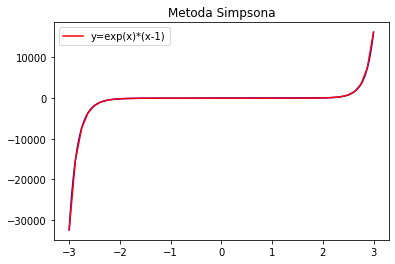

-2889.0902457615844

In [129]:
 Simpson(-3,3,expFun,1000000,'y=exp(x)*(x-1)' )